In [81]:
import evaluation_functions
import importlib

importlib.reload(evaluation_functions)

<module 'evaluation_functions' from '/Users/paigepark/Desktop/repos/deep-fert/code/evaluation_functions.py'>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
forecasts = []
for i in range(1,5):
    forecast = (
        np.loadtxt(f'../data/dl_forecast_{i}.txt')
    )
    forecasts.append(forecast)

In [15]:
actual = np.loadtxt('../data/asfr_test.txt')

In [25]:
forecasts_exp = [f.copy() for f in forecasts]
for f in forecasts_exp:
    f[:, 3] = np.exp(f[:, 3])

In [26]:
forecasts_exp

[array([[0.00000000e+00, 2.00600000e+03, 1.30000000e+01, 4.66883737e-05],
        [0.00000000e+00, 2.00600000e+03, 1.40000000e+01, 2.46666773e-04],
        [0.00000000e+00, 2.00600000e+03, 1.50000000e+01, 1.24983720e-03],
        ...,
        [3.80000000e+01, 2.01500000e+03, 5.20000000e+01, 1.46790485e-05],
        [3.80000000e+01, 2.01500000e+03, 5.30000000e+01, 1.23102828e-05],
        [3.80000000e+01, 2.01500000e+03, 5.40000000e+01, 1.21635224e-05]],
       shape=(16254, 4)),
 array([[0.00000000e+00, 2.00600000e+03, 1.30000000e+01, 4.58362797e-05],
        [0.00000000e+00, 2.00600000e+03, 1.40000000e+01, 3.07745642e-04],
        [0.00000000e+00, 2.00600000e+03, 1.50000000e+01, 1.45340682e-03],
        ...,
        [3.80000000e+01, 2.01500000e+03, 5.20000000e+01, 2.48000994e-05],
        [3.80000000e+01, 2.01500000e+03, 5.30000000e+01, 1.41442341e-05],
        [3.80000000e+01, 2.01500000e+03, 5.40000000e+01, 1.22442586e-05]],
       shape=(16254, 4)),
 array([[0.00000000e+00, 2.00600

In [21]:
actual

array([[0.000e+00, 2.006e+03, 1.300e+01, 4.000e-05],
       [0.000e+00, 2.006e+03, 1.400e+01, 3.300e-04],
       [0.000e+00, 2.006e+03, 1.500e+01, 1.420e-03],
       ...,
       [3.800e+01, 2.015e+03, 5.200e+01, 4.000e-05],
       [3.800e+01, 2.015e+03, 5.300e+01, 1.000e-05],
       [3.800e+01, 2.015e+03, 5.400e+01, 0.000e+00]], shape=(16254, 4))

In [57]:
mse_dl = []
for i in range(0,4):
    mse_dl.append(evaluation_functions.calculate_error(forecasts_exp[i], actual, changeratetolog=True))

In [38]:
mse_dl[0]

(np.float64(0.00014512437785115466),
 np.float64(0.012046757980932242),
 np.float64(0.31505412059716414))

In [43]:
forecasts_relu = np.loadtxt(f"../data/dl_forecast_explore.txt")
forecasts_relu[:, 3] = np.exp(forecasts_relu[:, 3])

In [86]:
mse_explore = evaluation_functions.calculate_error(forecasts_relu, actual, changeratetolog=True)

In [63]:
mse_explore

(np.float64(0.2149782819134002),
 np.float64(0.4636575049682688),
 np.float64(-0.08874711003374687))

In [59]:
forecasts_nonlog = np.loadtxt(f"../data/dl_forecast_nonlog.txt")
mse_nl = evaluation_functions.calculate_error(forecasts_nonlog, actual, changeratetolog=True)

In [65]:
forecasts_nonlog

array([[0.00000000e+00, 2.00600000e+03, 1.30000000e+01, 7.59442395e-04],
       [0.00000000e+00, 2.00600000e+03, 1.40000000e+01, 8.67713883e-04],
       [0.00000000e+00, 2.00600000e+03, 1.50000000e+01, 2.60379654e-03],
       ...,
       [3.80000000e+01, 2.01500000e+03, 5.20000000e+01, 8.13824357e-04],
       [3.80000000e+01, 2.01500000e+03, 5.30000000e+01, 7.86700111e-04],
       [3.80000000e+01, 2.01500000e+03, 5.40000000e+01, 7.70458719e-04]],
      shape=(16254, 4))

In [64]:
mse_nl

(np.float64(2.6032841550744403),
 np.float64(1.6134696015340482),
 np.float64(-0.30882874261519266))

In [7]:
forecasts_lc = np.loadtxt('../data/lc_forecast.csv', delimiter=',')

In [82]:
mse_lc = evaluation_functions.calculate_error(forecasts_lc, actual, changeratetolog=True)

In [66]:
mse_lc

(np.float64(0.5546190040258966),
 np.float64(0.7447274696329501),
 np.float64(-0.14254575841966033))

In [10]:
forecasts_hu = np.loadtxt('../data/hu_forecast.csv', delimiter=',')

In [83]:
mse_hu = evaluation_functions.calculate_error(forecasts_hu, actual, changeratetolog=True)

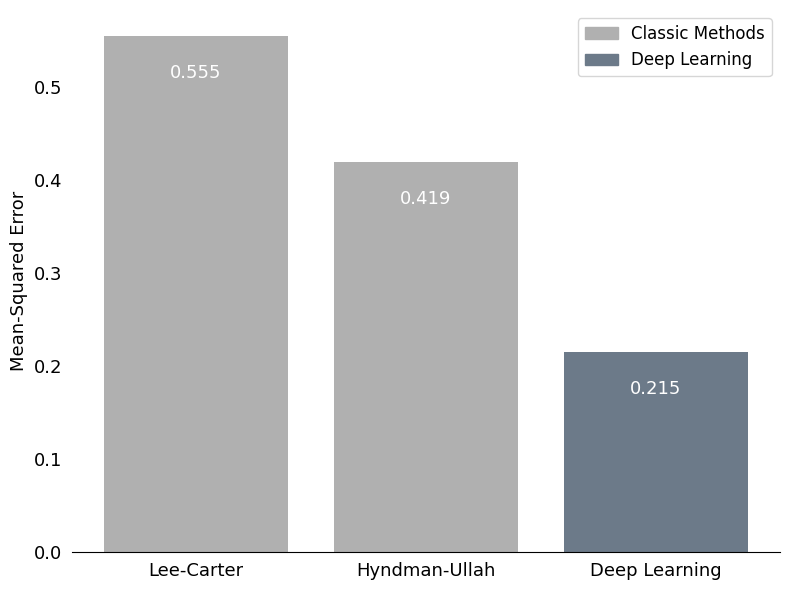

In [91]:
import matplotlib.pyplot as plt
from matplotlib import patches

values = [mse_lc, mse_hu, mse_explore]
labels = ['Lee-Carter', 'Hyndman-Ullah', 'Deep Learning'] 

# Define bar colors: light gray for classic methods, darker gray-blue for DL
bar_colors = ['#B0B0B0', '#B0B0B0', '#6C7A89']

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))

bars = ax.bar(labels, values, color=bar_colors)

# Clean axes (matching reference style)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False, bottom=False, labelsize=13)

# Bar labels (values on bars)
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        yval - 0.03,
        f'{yval:.3f}',
        ha='center',
        va='top',
        fontsize=13,
        color='white' if yval > 0.15 else 'black'
    )

# Legend with neutral tones
legend_handles = [
    patches.Patch(color='#B0B0B0', label='Classic Methods'),
    patches.Patch(color='#6C7A89', label='Deep Learning')
]
ax.legend(handles=legend_handles, fontsize=12, loc='upper right')

# Labels
ax.set_ylabel('Mean-Squared Error', fontsize=13)
ax.set_xlabel('')

plt.tight_layout()
plt.savefig("../prelim_results.pdf", format="pdf", bbox_inches='tight', transparent=True)
plt.show()